In [1]:
from pyspark.sql.functions import *       # added for the function 
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from operator import add


from datetime import datetime

spark = SparkSession.builder \
    .master('local') \
    .appName('WeeklyDelays') \
    .getOrCreate()

# Functions to add a 0 to days/months to make dates sortable
def formatDecimal(n):
    if len(n) == 1:
        return '0' + n
    else: 
        return n
    
def formatDate(n):
    n = n.split('-')
    return n[0]+'-'+formatDecimal(n[1])

allflights = spark.read.load("./data/alldata.csv",format="csv", sep=",", header="true")

df = allflights.select("Origin", "Dest")

#df.show()

In [2]:
# Most operated flights 

flightsCounts = df.rdd.map(lambda x: ( x[0]+'-'+x[1], 1)) \
                                    .reduceByKey(lambda x, y: x+y) \
                                    .sortBy(lambda x: -x[1]).toDF()

flightsCounts = flightsCounts.select(col("_1").alias("Flight"), col("_2").alias("Number of Operations"))

#flightsCounts.show()

In [3]:
# Airport Origin 

origins = df.rdd.distinct() \
                        .map(lambda r: (r[0], 1)) \
                        .reduceByKey(lambda x,y: x+y) \
                        .sortBy(lambda x: -x[1]).toDF()

origins = origins.select(col("_1").alias("Airport"), col("_2").alias("Origins"))

#origins.show()

In [13]:
# Airport destinations 

destinations = df.rdd.distinct() \
                        .map(lambda r: (r[1], 1)) \
                        .reduceByKey(lambda x,y: x+y) \
                        .sortBy(lambda x: -x[1]).toDF()

destinations = destinations.select(col("_1").alias("Airport"), col("_2").alias("Destinations"))

#Destinations.show()

Text(0,0.5,'Number of operations')

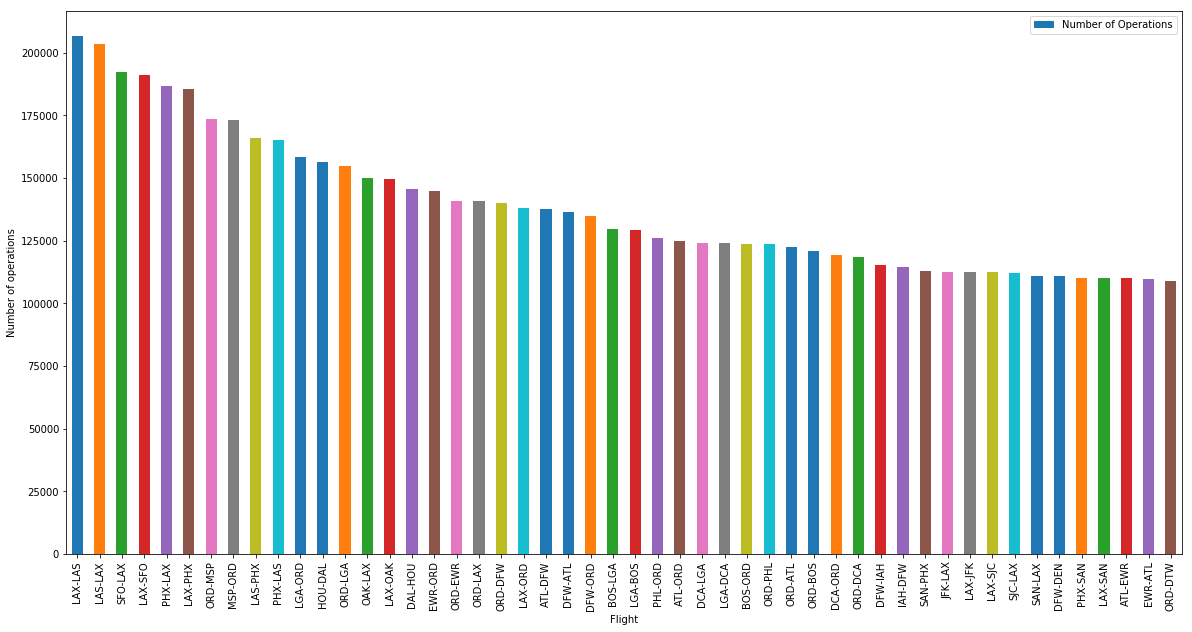

In [14]:
# Graph flight route
import matplotlib
import matplotlib.pyplot as plt

OperatedFlights = flightsCounts.toPandas()

ax1 = OperatedFlights.head(50).plot.bar(x='Flight', y='Number of Operations',figsize=(20, 10));
ax1.set_xlabel("Flight")
ax1.set_ylabel("Number of operations")

Text(0,0.5,'Number of flights')

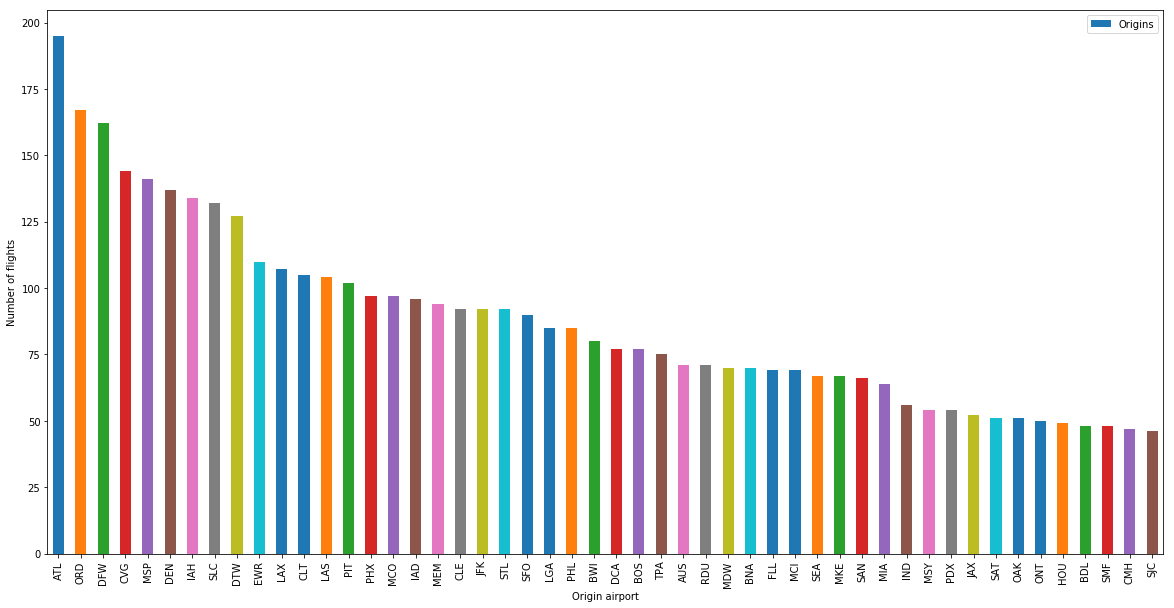

In [15]:
# Graph origins
import matplotlib
import matplotlib.pyplot as plt

OriginsStats = origins.toPandas()

ax2 = OriginsStats.head(50).plot.bar(x='Airport', y='Origins',figsize=(20, 10));
ax2.set_xlabel("Origin airport")
ax2.set_ylabel("Number of flights")

Text(0,0.5,'Number of flights')

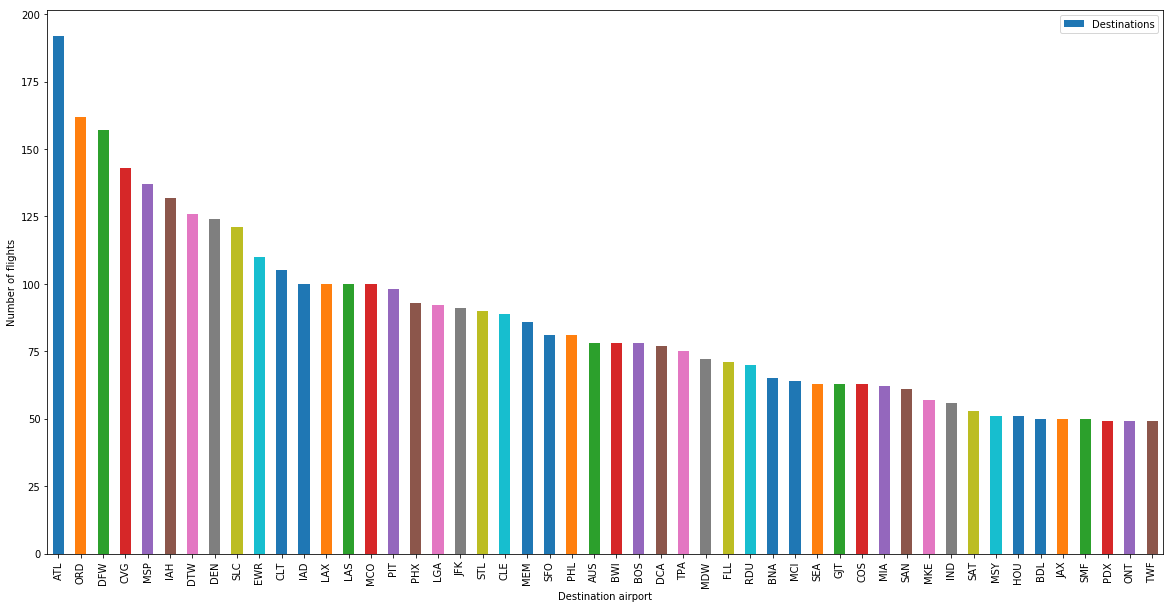

In [16]:
# Graph destinations
import matplotlib
import matplotlib.pyplot as plt

DestinationStats = destinations.toPandas()

ax3 = DestinationStats.head(50).plot.bar(x='Airport', y='Destinations',figsize=(20, 10));
ax3.set_xlabel("Destination airport")
ax3.set_ylabel("Number of flights")

In [17]:
## Statistics flight route
highest = OperatedFlights.loc[OperatedFlights['Number of Operations'].idxmax()] # Day with highest cancellations
#print(highest)
lowest = OperatedFlights.loc[OperatedFlights['Number of Operations'].idxmin()]  # Day with lowest cancellations
#print(lowest)
summary = flightsCounts.describe('Number of Operations')
print('\nFlight and number with highest destination : %s with %.f flights' % (highest[0], highest[1]))
print('Flight and number with lowest destination : %s with %.f flights' % (lowest[0], lowest[1]))
summary.show()


Flight and number with highest destination : LAX-LAS with 206494 flights
Flight and number with lowest destination : TUL-MTJ with 1 flights
+-------+--------------------+
|summary|Number of Operations|
+-------+--------------------+
|  count|                7727|
|   mean|  10939.974375566197|
| stddev|  19253.881898500196|
|    min|                   1|
|    max|              206494|
+-------+--------------------+



In [19]:
## Statistics origin airport
highest = OriginsStats.loc[OriginsStats['Origins'].idxmax()] # Day with highest cancellations
#print(highest)
lowest = OriginsStats.loc[OriginsStats['Origins'].idxmin()]  # Day with lowest cancellations
#print(lowest)
summary = origins.describe('Origins')
print('\nAirport and number with highest origin : %s with %.f flights' % (highest[0], highest[1]))
print('Airport and number with lowest origin : %s with %.f flights' % (lowest[0], lowest[1]))
summary.show()


Airport and number with highest origin : ATL with 195 flights
Airport and number with lowest origin : EAU with 1 flights
+-------+------------------+
|summary|           Origins|
+-------+------------------+
|  count|               337|
|   mean|22.928783382789316|
| stddev|32.049825922619284|
|    min|                 1|
|    max|               195|
+-------+------------------+



In [20]:
## Statistics destination airport
highest = DestinationStats.loc[DestinationStats['Destinations'].idxmax()] # Day with highest cancellations
#print(highest)
lowest = DestinationStats.loc[DestinationStats['Destinations'].idxmin()]  # Day with lowest cancellations
#print(lowest)
summary = destinations.describe('Destinations')
print('\nAirport and number with highest destination : %s with %.f flights' % (highest[0], highest[1]))
print('Airport and number with lowest destination : %s with %.f flights' % (lowest[0], lowest[1]))
summary.show()


Airport and number with highest destination : ATL with 192 flights
Airport and number with lowest destination : ILG with 1 flights
+-------+-----------------+
|summary|     Destinations|
+-------+-----------------+
|  count|              341|
|   mean|22.65982404692082|
| stddev|31.24055337638991|
|    min|                1|
|    max|              192|
+-------+-----------------+

